#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
##Lección 4 - Redes neuronales multicapa

A continuación la clase de la red neuronal de una capa (que se explicó en clase)

In [1]:
"""
Multilayer Perceptron
Dr. Carlos Villaseñor
"""

# Packages
import numpy as np
import pandas as pd

def linear(z, derivative=False):
    a = z
    if derivative:
        da = 1
        return a, da
    return a


def sigmoid(z, derivative=False):
    a = 1/(1+np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a


def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a


def relu(z, derivative=False):
    a = z * (z >= 0)
    if derivative:
        da = np.array(z >= 0, dtype=float)
        return a, da
    return a

class MLP:

    def __init__(self, layers_dims,
                 hidden_activation=relu,
                 output_activation=sigmoid,
                 learning_rate=0.1):

        # Instance Attributes
        self.L = len(layers_dims) - 1
        self.w = [None] * (self.L + 1)
        self.b = [None] * (self.L + 1)
        self.f = [None] * (self.L + 1)
        self.layers = layers_dims
        self.eta = learning_rate

        # Initialize weights
        for l in range(1, self.L + 1):
            self.w[l] = -1 + 2 * np.random.rand(layers_dims[l], layers_dims[l-1])
            self.b[l] = -1 + 2 * np.random.rand(layers_dims[l], 1)

            if l == self.L:
                self.f[l] = output_activation
            else:
                self.f[l] = hidden_activation


    def predict(self, X):
        a = np.asanyarray(X)
        for l in range(1, self.L + 1):
            z = np.dot(self.w[l], a) + self.b[l]
            a = self.f[l](z)
        return a

    def fit(self, X, Y, epochs=100):

        # Number of samples
        P = X.shape[1]

        #Gradient Descent
        for _ in range(epochs):
            for p in range(P):

                # Initialize activations and their derivatives
                a = [None] * (self.L + 1)
                da = [None] * (self.L + 1)
                lg = [None] * (self.L + 1)

                # Propagation
                a[0] = X[:, p].reshape(self.layers[0], 1)
                for l in range(1, self.L + 1):
                    z = np.dot(self.w[l], a[l-1]) + self.b[l]
                    a[l], da[l] = self.f[l](z, derivative=True)

                # Backpropagation
                for l in range(self.L, 0, -1):
                    # Calculate local gradient (lg)
                    if l == self.L:
                        lg[l] = (Y[:, p] - a[l]) * da[l]
                    else:
                        lg[l] = np.dot(self.w[l + 1].T, lg[l+1]) * da[l]

                # Update parameters
                for l in range(1, self.L + 1):
                    self.w[l] += self.eta * np.dot(lg[l], a[l - 1].T)
                    self.b[l] += self.eta * lg[l]

Para su actividad necesitarán esta función para dibujar

In [2]:
import matplotlib.pyplot as plt


def MLP_binary_classification_2d(X, Y, net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0, i] == 0:
            plt.plot(X[0, i], X[1, i], '.r')
        else:
            plt.plot(X[0, i], X[1, i], '.b')
    xmin, ymin = np.min(X[0, :]) - 0.5, np.min(X[1, :]) - 0.5
    xmax, ymax = np.max(X[0, :]) + 0.5, np.max(X[1, :]) + 0.5
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                         np.linspace(ymin, ymax, 100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, alpha=0.8,
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.grid()
    plt.show()

Vamos a crear el dataset para el problema de las medias lunas

In [3]:
df = pd.read_csv('./DataSets/blobs.csv')
X = np.asanyarray(df.drop(columns=['y'])).T
Y = np.asanyarray(df[['y']]).T
print(X.shape)
print(Y.shape)

# n, p = X.shape
# for i in range(n):
#     X[i, :] = (X[i, :] - X[i, :].min()) / (X[i, :].max() - X[i, :].min())

(2, 1000)
(1, 1000)


Dibujemos primeramente que nos da la red neuronal sin entrenar

[[2.99019383e-01 2.13116790e-04 2.64123533e-01 2.31176133e-02
  3.57216400e-03 1.70795045e-05 1.73238705e-03 5.51948999e-05
  9.65201796e-04 1.42274721e-02 8.89132678e-06 1.30210727e-01
  8.69101481e-03 5.46536026e-04 1.28433042e-06 1.99449825e-03
  9.99110518e-04 1.04962831e-02 3.41866804e-01 8.17558671e-04
  4.47574751e-05 1.01359029e-02 5.11570033e-02 4.47031891e-03
  1.67890454e-03 2.97980701e-01 2.59534306e-03 7.34284761e-02
  1.26808007e-03 9.37426940e-06 8.81630250e-05 4.13547278e-03
  2.47056544e-02 3.28998012e-02 1.56865673e-01 2.28963742e-04
  1.59146017e-01 8.05014566e-04 2.36354252e-02 5.44036536e-05
  5.02684185e-04 1.06552444e-02 7.33895114e-03 2.42200189e-05
  5.86438528e-03 1.54446733e-02 1.79170111e-01 2.00084880e-03
  1.55404561e-04 3.48457813e-04 1.28983938e-02 1.35216700e-03
  3.19343697e-04 7.73576158e-04 1.03395743e-03 3.97582515e-04
  5.71007025e-02 5.12081696e-04 2.69431781e-04 4.65448637e-03
  5.50254342e-04 2.03426184e-01 5.62325402e-02 1.23384977e-03
  1.3860

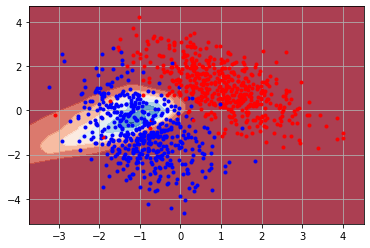

In [4]:
net = MLP((2, 100, 1), learning_rate=0.2)
print(net.predict(X))
MLP_binary_classification_2d(X, Y, net)

Ahora vamos a entrenar!!

[[1.00000000e+00 1.30818093e-12 1.00000000e+00 1.00000000e+00
  2.20385653e-10 8.56089689e-23 7.52684041e-13 1.02522982e-21
  6.06417578e-12 4.91114814e-07 1.86425433e-07 9.99990695e-01
  9.97920932e-01 2.95680362e-15 8.15374254e-18 8.25743557e-12
  7.55460454e-12 1.00000000e+00 1.00000000e+00 1.34732200e-12
  2.17658679e-22 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 9.99999995e-01 1.16222201e-09 1.00000000e+00
  6.66132177e-07 3.97176024e-18 7.64595543e-02 4.43901703e-10
  9.99999995e-01 1.00000000e+00 1.00000000e+00 8.26735946e-19
  1.00000000e+00 3.01510593e-13 1.00000000e+00 8.90490285e-13
  3.70466704e-15 9.99847618e-01 9.97668838e-01 2.91470898e-24
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  6.10419300e-08 2.61540050e-16 9.99999993e-01 1.00000000e+00
  9.80934520e-16 1.47801475e-01 3.18656629e-12 9.97219852e-01
  1.05051550e-01 8.62047585e-13 1.55564806e-17 1.00000000e+00
  9.64907899e-16 1.00000000e+00 1.00000000e+00 1.45753497e-11
  4.2200

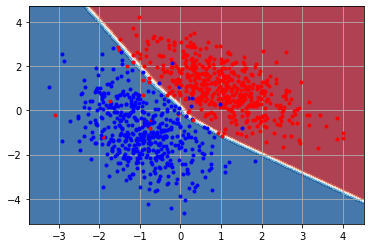

In [5]:
net.fit(X, Y)
print(net.predict(X))
MLP_binary_classification_2d(X, Y, net)